# **EXPLORATORY DATA ANALYSIS**

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Part 1: DataFrame Loading, Cleaning and Categorizing

In [3]:
carData = pd.read_csv('datasets/car_data_updated.csv')
carData.sample(5)

Unnamed: 0                                        LISTING_URL  \
1937        1937  https://www.sgcarmart.com/used_cars/info.php?I...   
1809        1809  https://www.sgcarmart.com/used_cars/info.php?I...   
2492        2492  https://www.sgcarmart.com/used_cars/info.php?I...   
1080        1080  https://www.sgcarmart.com/used_cars/info.php?I...   
3485        3485  https://www.sgcarmart.com/used_cars/info.php?I...   

           BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
1937         BMW  112988.0               32080.0  23-Dec-2015     81000.0   
1809        Audi  172800.0               23430.0  13-Jul-2020     61000.0   
2492  Volkswagen   85800.0               13700.0  23-Jul-2010         NaN   
1080        2017   56800.0               15620.0  25-Sep-2017         NaN   
3485      Subaru   50800.0               14860.0  10-Mar-2017         NaN   

     MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  ...  SCRAPE_DATE  \
1937              2015             2384.0         Auto  ...   18/04/2024   
1809              2019             1194.0         Auto  ...   18/04/2024   
2492              2010             1672.0         Auto  ...   18/04/2024   
1080              2017              974.0         Auto  ...   18/04/2024   
3485              2016             1208.0         Auto  ...   18/04/2024   

          OMV       ARF  POWER  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
1937  81237.0  118227.0  321.0               60001.0             609.0   
1809  43839.0   53375.0  248.0               35889.0            2254.0   
2492  29235.0   29235.0  197.0               33568.0            2284.0   
1080      NaN       NaN  120.0               49000.0            1251.0   
3485  15690.0   15690.0  147.0               50621.0             739.0   

      ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  VEHICLE_TYPE  
1937              2998.0          1770.0           3.0  Luxury Sedan  
1809              1984.0          1795.0           1.0           SUV  
2492              1984.0          1318.0           3.0    Sports Car  
1080              1797.0          1440.0           2.0           SUV  
3485              1995.0          1566.0           1.0           SUV  

[5 rows x 21 columns]

In [4]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3999 non-null   int64  
 1   LISTING_URL                   3999 non-null   object 
 2   BRAND                         3999 non-null   object 
 3   PRICE                         3981 non-null   float64
 4   DEPRE_VALUE_PER_YEAR          3917 non-null   float64
 5   REG_DATE                      3999 non-null   object 
 6   MILEAGE_KM                    3374 non-null   float64
 7   MANUFACTURED_YEAR             3999 non-null   object 
 8   ROAD_TAX_PER_YEAR             3952 non-null   float64
 9   TRANSMISSION                  3993 non-null   object 
 10  DEREG_VALUE_FROM_SCRAPE_DATE  3721 non-null   float64
 11  SCRAPE_DATE                   3999 non-null   object 
 12  OMV                           3393 non-null   float64
 13  ARF

In [5]:
car_data1 = carData.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
car_data1.dropna(inplace=True)

In [6]:
car_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2547 entries, 0 to 3997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2547 non-null   int64  
 1   BRAND                         2547 non-null   object 
 2   PRICE                         2547 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2547 non-null   float64
 4   REG_DATE                      2547 non-null   object 
 5   MILEAGE_KM                    2547 non-null   float64
 6   MANUFACTURED_YEAR             2547 non-null   object 
 7   ROAD_TAX_PER_YEAR             2547 non-null   float64
 8   TRANSMISSION                  2547 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2547 non-null   float64
 10  OMV                           2547 non-null   float64
 11  ARF                           2547 non-null   float64
 12  POWER                         2547 non-null   float64
 13  COE_FROM

In [7]:
car_data1.sample(5)

Unnamed: 0          BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  \
1705        1705         Subaru  111800.0               14890.0  16-Apr-2021   
2542        2542           2019  144800.0               22470.0  29-Oct-2019   
283          283            BMW  130800.0               15750.0  28-May-2021   
2688        2688          Mazda   62500.0               15710.0  22-Jun-2017   
3150        3150  Mercedes-Benz   60000.0               22580.0  29-Apr-2016   

      MILEAGE_KM MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
1705     53000.0              2021             1208.0         Auto   
2542     79440.0              2019             1786.0         Auto   
283      50424.0              2021              684.0         Auto   
2688     84669.0              2017             1210.0         Auto   
3150     97000.0              2016              740.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  POWER  \
1705                       44717.0  15319.0  15319.0  154.0   
2542                       53853.0  34980.0  40972.0  227.0   
283                        58005.0  32653.0  37715.0  107.0   
2688                       33745.0  23739.0  25235.0  162.0   
3150                       26706.0  29588.0  28424.0  154.0   

      COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
1705               47506.0            2228.0              1995.0   
2542               41805.0            2005.0              2488.0   
283                41801.0            2594.0              1499.0   
2688               54616.0            1158.0              1998.0   
3150               47604.0             730.0              1595.0   

      CURB_WEIGHT_KG  NO_OF_OWNERS  VEHICLE_TYPE  
1705          1489.0           2.0           SUV  
2542          1916.0           1.0           SUV  
283           1340.0           2.0     Hatchback  
2688          1472.0           2.0  Luxury Sedan  
3150          1430.0           4.0  Luxury Sedan

In [8]:
(car_data1['BRAND'].value_counts())

BRAND
Mercedes-Benz    383
BMW              328
Toyota           277
Honda            262
Audi             139
Nissan           126
Volkswagen       115
Porsche          106
Hyundai           81
Mazda             76
Kia               64
Lexus             57
Mitsubishi        53
Subaru            51
MINI              45
Volvo             45
Jaguar            25
Peugeot           22
Maserati          21
Suzuki            21
Skoda             20
Bentley           18
Citroen           18
Ferrari           17
Land              17
Chevrolet         16
Opel              15
Ford              14
Rolls-Royce       14
Infiniti          10
SEAT              10
2018               9
McLaren            8
Lamborghini        8
Alfa               7
2019               6
2016               5
2017               4
Perodua            4
Jeep               4
MG                 3
Ssangyong          3
Renault            3
2021               3
Lotus              2
2020               2
Mitsuoka           2
Aston  

We noticed errors in the data, so we removed the values that were wrongly placed in the "BRAND" column.

In [9]:

car_data = car_data1[~car_data1.BRAND.str.contains(r'\d')]
car_data.sort_index()

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 0 to 3997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2515 non-null   int64  
 1   BRAND                         2515 non-null   object 
 2   PRICE                         2515 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2515 non-null   float64
 4   REG_DATE                      2515 non-null   object 
 5   MILEAGE_KM                    2515 non-null   float64
 6   MANUFACTURED_YEAR             2515 non-null   object 
 7   ROAD_TAX_PER_YEAR             2515 non-null   float64
 8   TRANSMISSION                  2515 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2515 non-null   float64
 10  OMV                           2515 non-null   float64
 11  ARF                           2515 non-null   float64
 12  POWER                         2515 non-null   float64
 13  COE_FROM

In [10]:
car_data['BRAND'].value_counts()

BRAND
Mercedes-Benz    383
BMW              328
Toyota           277
Honda            262
Audi             139
Nissan           126
Volkswagen       115
Porsche          106
Hyundai           81
Mazda             76
Kia               64
Lexus             57
Mitsubishi        53
Subaru            51
MINI              45
Volvo             45
Jaguar            25
Peugeot           22
Suzuki            21
Maserati          21
Skoda             20
Bentley           18
Citroen           18
Ferrari           17
Land              17
Chevrolet         16
Opel              15
Rolls-Royce       14
Ford              14
Infiniti          10
SEAT              10
Lamborghini        8
McLaren            8
Alfa               7
Jeep               4
Perodua            4
Ssangyong          3
Renault            3
MG                 3
Lotus              2
Mitsuoka           2
Aston              2
Daihatsu           1
Chrysler           1
Morgan             1
Name: count, dtype: int64

Converting Transmission -> 1  for auto, 0  for manual

In [11]:
car_data['TRANSMISSION'].value_counts()

TRANSMISSION
Auto      2479
Manual      36
Name: count, dtype: int64

In [12]:
car_data['TRANSMISSION_CONVERT'] = car_data['TRANSMISSION'].apply(lambda x: 1 if x=='Auto' else 0)
car_data.drop('TRANSMISSION', axis=1, inplace=True)
car_data.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"},inplace=True)
car_data.sample(10)

/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/517968243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['TRANSMISSION_CONVERT'] = car_data['TRANSMISSION'].apply(lambda x: 1 if x=='Auto' else 0)
/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/517968243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.drop('TRANSMISSION', axis=1, inplace=True)
/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/517968243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Unnamed: 0          BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  \
2350        2350          Lexus  212800.0               28720.0  19-Mar-2020   
2188        2188        Porsche  328800.0               41650.0  06-Jul-2020   
227          227     Mitsubishi   41800.0               17690.0  21-Jan-2016   
1985        1985         Toyota   91900.0               30840.0  25-Aug-2016   
3564        3564          Mazda   34800.0               14990.0  31-Dec-2015   
173          173  Mercedes-Benz   99800.0               22750.0  16-Jan-2017   
492          492  Mercedes-Benz  103800.0               17580.0  17-Apr-2019   
2043        2043          Skoda  156800.0               19660.0  29-Jun-2021   
1054        1054            BMW   74888.0               12410.0  20-May-2010   
3465        3465        Porsche  244800.0               55190.0  03-Feb-2016   

      MILEAGE_KM MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR  \
2350     31000.0              2020             3100.0   
2188     54000.0              2020             2380.0   
227      95000.0              2015             1636.0   
1985    113987.0              2015             1792.0   
3564    124000.0              2015             1210.0   
173      54000.0              2016             1202.0   
492      48000.0              2019              740.0   
2043     48000.0              2021              624.0   
1054    116000.0              2010             2514.0   
3465     20400.0              2015             2382.0   

      DEREG_VALUE_FROM_SCRAPE_DATE       OMV       ARF  POWER  \
2350                       83684.0   63165.0   85697.0  296.0   
2188                      128114.0   93187.0  139737.0  335.0   
227                        21422.0   20990.0   21386.0  164.0   
1985                       36566.0   33433.0   38807.0  179.0   
3564                       20418.0   18596.0   18596.0  162.0   
173                        60260.0   57065.0   74717.0  181.0   
492                        35616.0   28463.0   31849.0  120.0   
2043                       66953.0   27547.0   30566.0  147.0   
1054                       20260.0   40475.0   40475.0  201.0   
3465                      171103.0  177511.0  291520.0  414.0   

      COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
2350               32801.0            1855.0              3456.0   
2188               37500.0            2257.0              2995.0   
227                54920.0             637.0              2360.0   
1985               56500.0             856.0              2493.0   
3564               60003.0             607.0              1998.0   
173                56206.0             978.0              1991.0   
492                26659.0            1499.0              1595.0   
2043               62100.0            2615.0              1395.0   
1054               33568.0            2192.0              2497.0   
3465               60001.0             640.0              2997.0   

      CURB_WEIGHT_KG  NO_OF_OWNERS  VEHICLE_TYPE  TRANSMISSION  
2350          1980.0           1.0           SUV             1  
2188          2060.0           2.0           SUV             1  
227           1530.0           1.0           SUV             1  
1985          2000.0           4.0           MPV             1  
3564          1454.0           1.0  Luxury Sedan             1  
173           1605.0           2.0  Luxury Sedan             1  
492           1435.0           2.0           SUV             1  
2043          1572.0           1.0           SUV             1  
1054          1650.0           6.0  Luxury Sedan             1  
3465          1810.0           2.0    Sports Car             1

In [13]:
#whitespace stripping 
car_data['VEHICLE_TYPE'].apply(str.strip)
car_data['VEHICLE_TYPE'].apply(str.lstrip)

car_data['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
SUV                666
Luxury Sedan       551
Sports Car         362
Mid-Sized Sedan    319
Hatchback          314
MPV                251
Stationwagon        52
Name: count, dtype: int64

#### Now, we try to get the age of the cars using datetime conversion so we can use it as a predictor variable

In [14]:
#converting reg_date to datetime and Manufactured_year to int since it is an obj 
car_data['REG_DATE'] = pd.to_datetime(car_data['REG_DATE'])
car_data['MANUFACTURED_YEAR'] = car_data['MANUFACTURED_YEAR'].astype(int)
car_data[['REG_DATE','MANUFACTURED_YEAR']].dtypes

/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/3702485893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['REG_DATE'] = pd.to_datetime(car_data['REG_DATE'])
/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/3702485893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['MANUFACTURED_YEAR'] = car_data['MANUFACTURED_YEAR'].astype(int)


REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int64
dtype: object

In [15]:
car_data.dtypes

Unnamed: 0                               int64
BRAND                                   object
PRICE                                  float64
DEPRE_VALUE_PER_YEAR                   float64
REG_DATE                        datetime64[ns]
MILEAGE_KM                             float64
MANUFACTURED_YEAR                        int64
ROAD_TAX_PER_YEAR                      float64
DEREG_VALUE_FROM_SCRAPE_DATE           float64
OMV                                    float64
ARF                                    float64
POWER                                  float64
COE_FROM_SCRAPE_DATE                   float64
DAYS_OF_COE_LEFT                       float64
ENGINE_CAPACITY_CC                     float64
CURB_WEIGHT_KG                         float64
NO_OF_OWNERS                           float64
VEHICLE_TYPE                            object
TRANSMISSION                             int64
dtype: object

In [16]:
#run this cell once only
carData['SCRAPE_DATE'] = \
pd.to_datetime(carData['SCRAPE_DATE']).dt.year #convert scrape date to integer to perform operations on them

/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/2758975572.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(carData['SCRAPE_DATE']).dt.year #convert scrape date to integer to perform operations on them


In [17]:
carData['SCRAPE_DATE']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
3994    2024
3995    2024
3996    2024
3997    2024
3998    2024
Name: SCRAPE_DATE, Length: 3999, dtype: int32

In [18]:
from datetime import date

car_data['CAR_AGE'] = carData['SCRAPE_DATE'] - car_data['MANUFACTURED_YEAR']
car_data['CAR_AGE'].astype(int)


/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_27844/2006181924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['CAR_AGE'] = carData['SCRAPE_DATE'] - car_data['MANUFACTURED_YEAR']


0        6
1        2
2        3
9        4
10       6
        ..
3991     3
3992    15
3994     7
3996    13
3997     2
Name: CAR_AGE, Length: 2515, dtype: int64

In [19]:
car_data = car_data[['BRAND', 'PRICE','DEPRE_VALUE_PER_YEAR','MILEAGE_KM','COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG','POWER',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 0 to 3997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         2515 non-null   object        
 1   PRICE                         2515 non-null   float64       
 2   DEPRE_VALUE_PER_YEAR          2515 non-null   float64       
 3   MILEAGE_KM                    2515 non-null   float64       
 4   COE_FROM_SCRAPE_DATE          2515 non-null   float64       
 5   DAYS_OF_COE_LEFT              2515 non-null   float64       
 6   REG_DATE                      2515 non-null   datetime64[ns]
 7   MANUFACTURED_YEAR             2515 non-null   int64         
 8   CAR_AGE                       2515 non-null   float64       
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2515 non-null   float64       
 10  OMV                           2515 non-null   float64       
 11  ARF                           2515 

<Axes: >

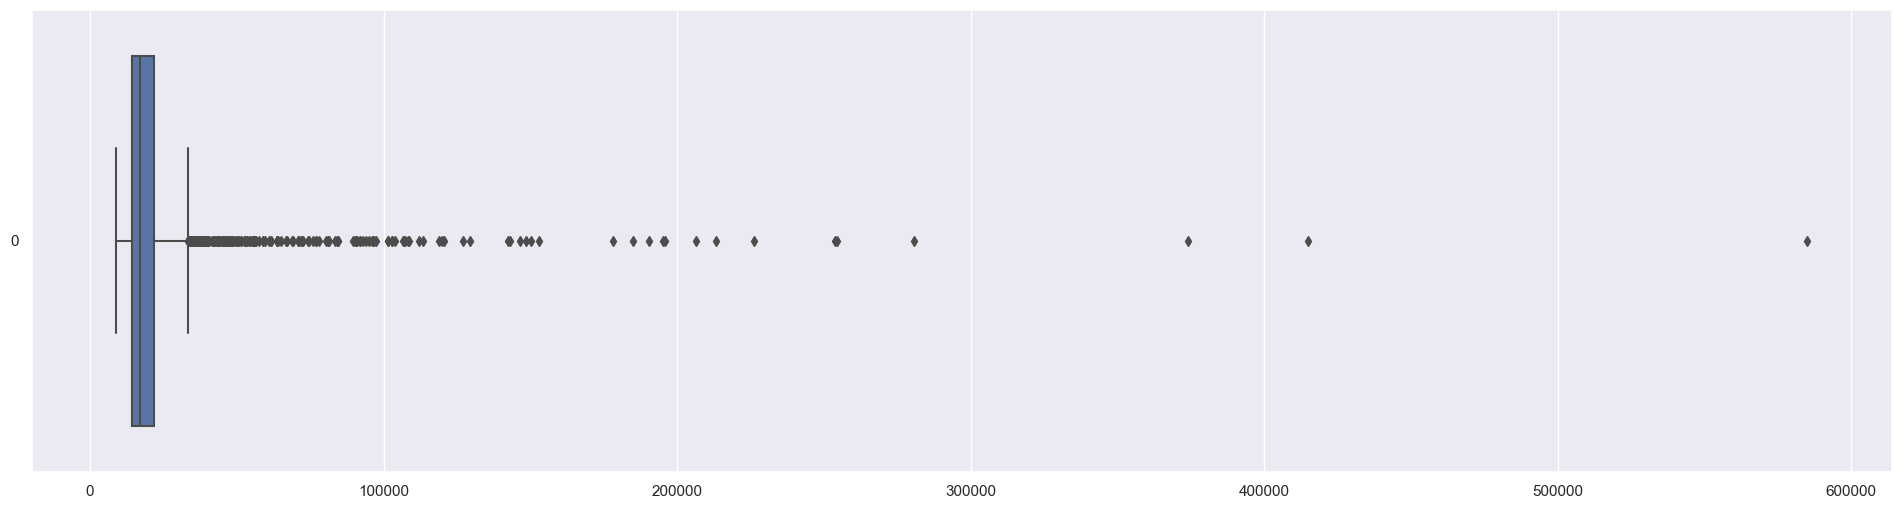

In [20]:
f=plt.figure(figsize=(24,6))
sb.boxplot(data=car_data["DEPRE_VALUE_PER_YEAR"], orient ='h')

We noticed cars that have a short COE remaining tend to have inflated Depreciation values. We decided to remove outliers to make our model more accurate.

In [21]:
depreciation_df = car_data["DEPRE_VALUE_PER_YEAR"]
Q1 = depreciation_df.quantile(0.25)
Q3 = depreciation_df.quantile(0.75)
IQR = Q3 - Q1
upper_lim = Q3 + 1.5*IQR
car_data = car_data[(car_data["DEPRE_VALUE_PER_YEAR"] < upper_lim)]
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2298 entries, 0 to 3997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         2298 non-null   object        
 1   PRICE                         2298 non-null   float64       
 2   DEPRE_VALUE_PER_YEAR          2298 non-null   float64       
 3   MILEAGE_KM                    2298 non-null   float64       
 4   COE_FROM_SCRAPE_DATE          2298 non-null   float64       
 5   DAYS_OF_COE_LEFT              2298 non-null   float64       
 6   REG_DATE                      2298 non-null   datetime64[ns]
 7   MANUFACTURED_YEAR             2298 non-null   int64         
 8   CAR_AGE                       2298 non-null   float64       
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2298 non-null   float64       
 10  OMV                           2298 non-null   float64       
 11  ARF                           2298 

### Part 2: Data Visualisation

<Axes: >

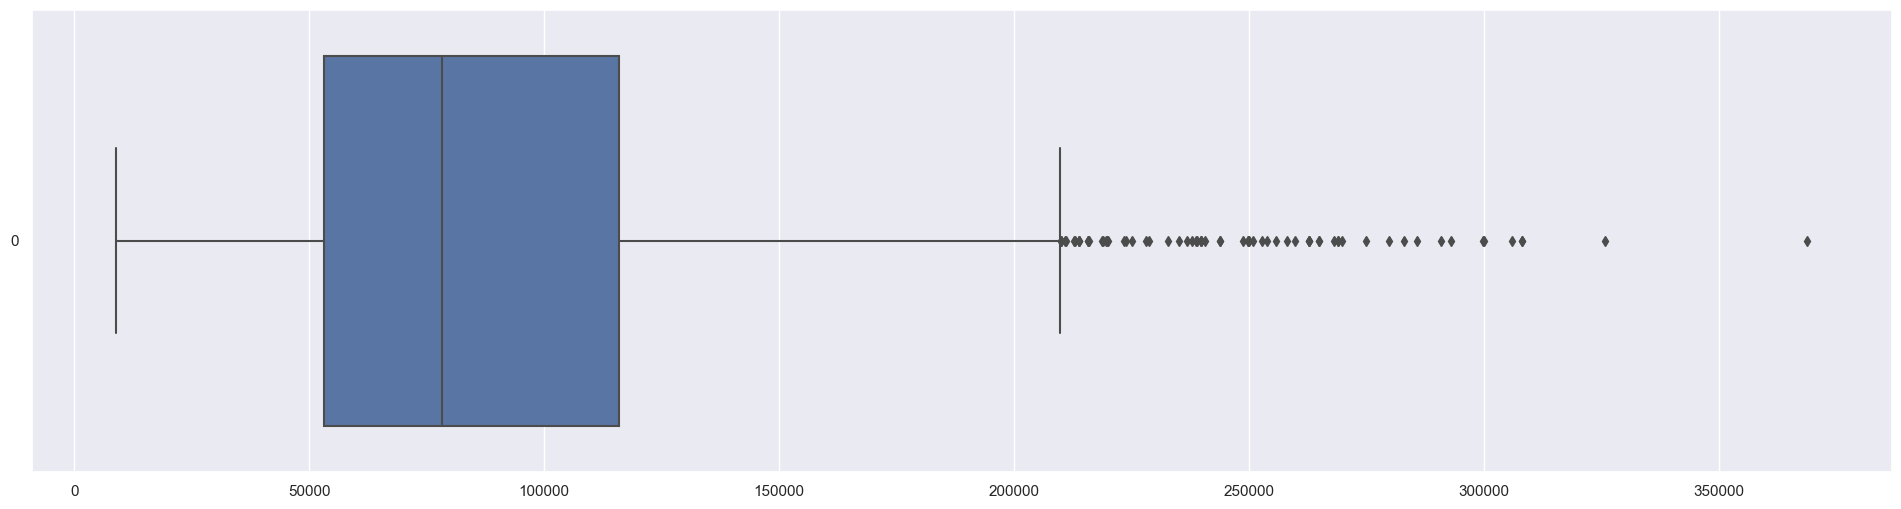

In [22]:
f=plt.figure(figsize=(24,6))
sb.boxplot(data=car_data["PRICE"], orient ='h')

<Axes: >

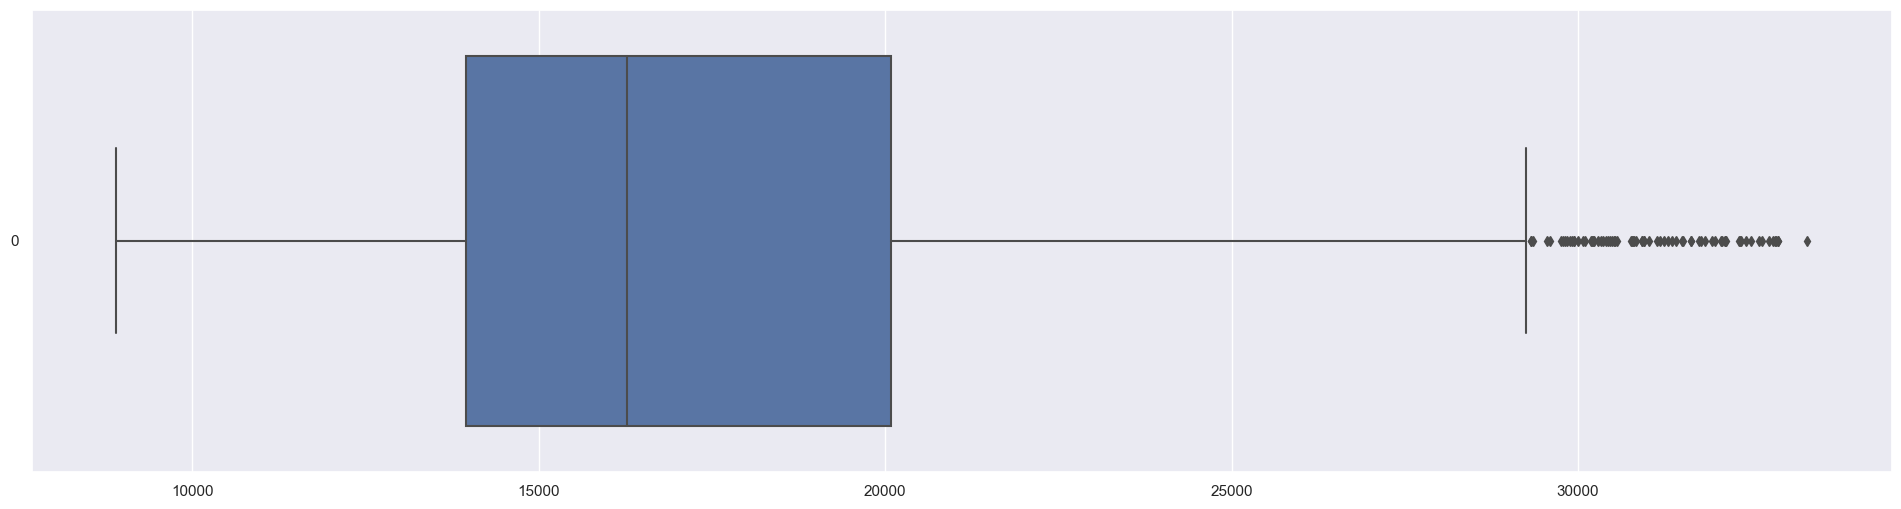

In [23]:
f=plt.figure(figsize=(24,6))
sb.boxplot(data=car_data["DEPRE_VALUE_PER_YEAR"], orient ='h')

<Axes: xlabel='PRICE', ylabel='Count'>

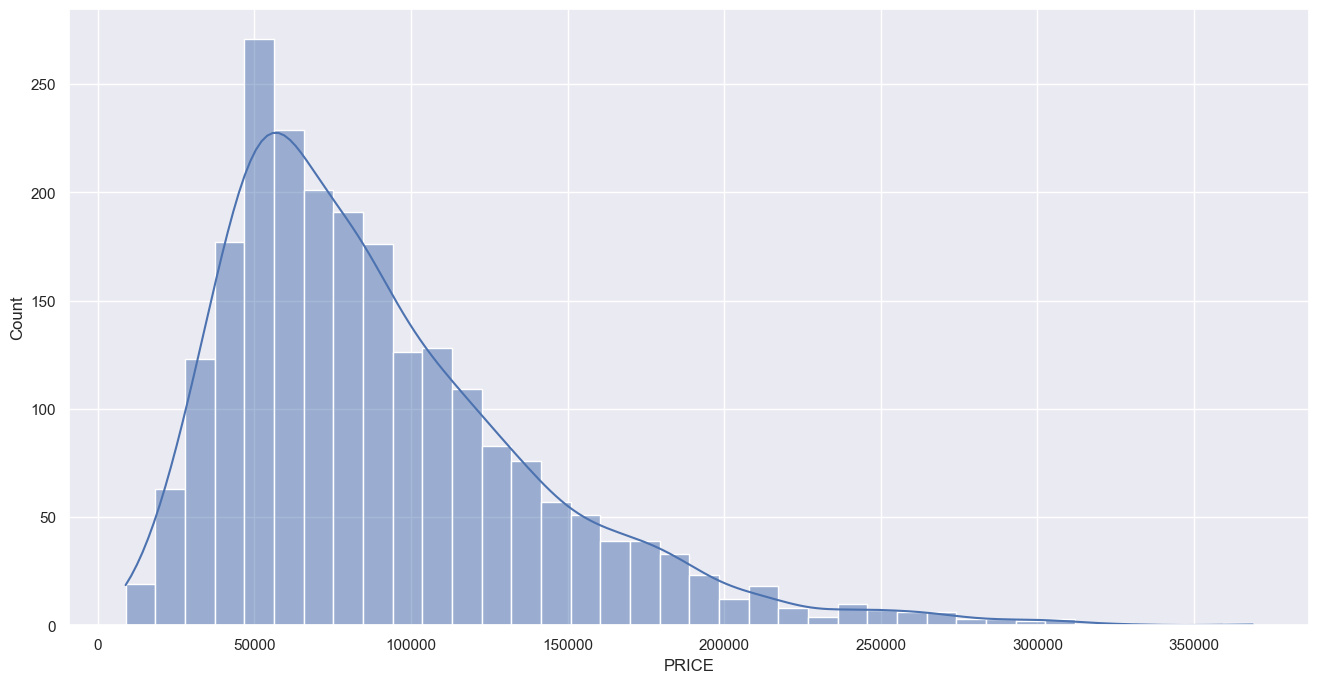

In [24]:
f= plt.figure(figsize=(16,8))
sb.histplot(data=car_data["PRICE"], kde=True)

<Axes: xlabel='DEPRE_VALUE_PER_YEAR', ylabel='Count'>

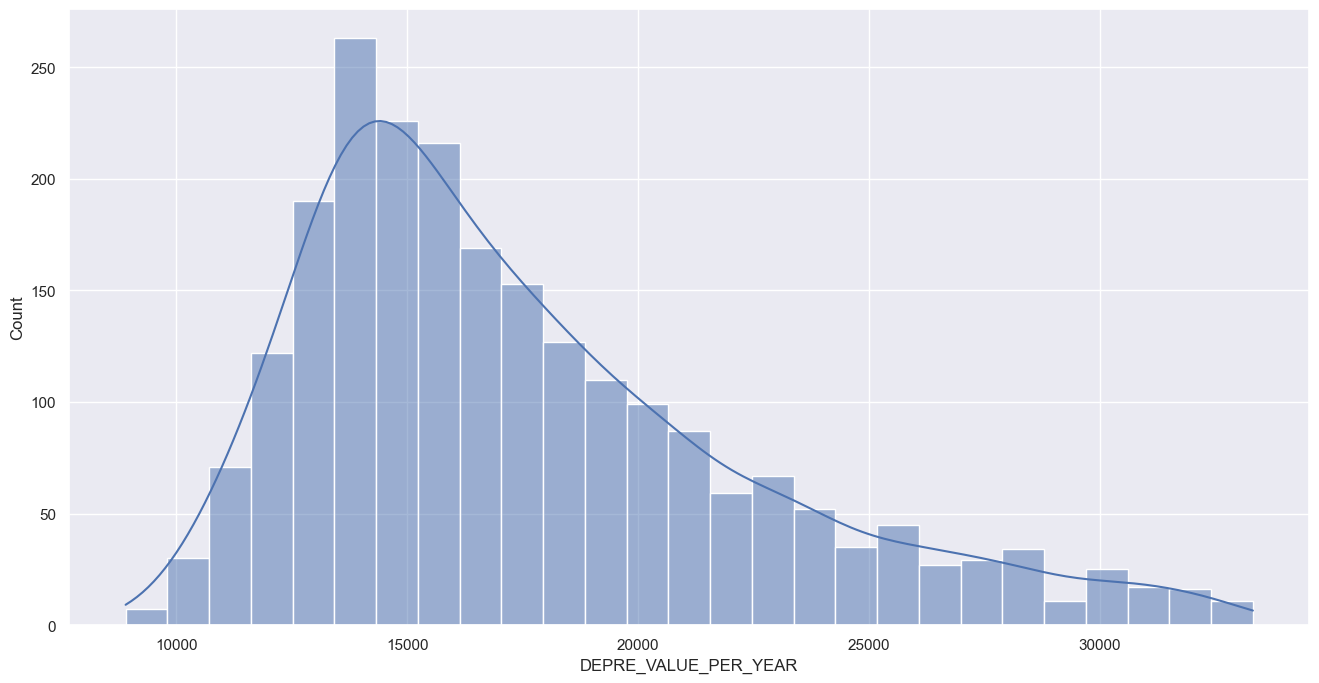

In [25]:
f= plt.figure(figsize=(16,8))
sb.histplot(data=car_data["DEPRE_VALUE_PER_YEAR"], kde=True)

In [26]:
numDF = car_data.select_dtypes(include= ['float','int64'])
numDF.describe()

PRICE  DEPRE_VALUE_PER_YEAR     MILEAGE_KM  \
count    2298.000000           2298.000000    2298.000000   
mean    89784.548303          17534.926023   93302.141862   
std     50114.371914           4866.284835   43336.661573   
min      8888.000000           8900.000000       8.000000   
25%     53088.000000          13952.500000   64000.000000   
50%     78262.500000          16275.000000   90000.000000   
75%    115800.000000          20087.500000  120080.750000   
max    368800.000000          33310.000000  304000.000000   

       COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  MANUFACTURED_YEAR      CAR_AGE  \
count           2298.000000       2298.000000        2298.000000  2298.000000   
mean           47091.282419       1543.401218        2015.718016     8.281984   
std            17206.976761        760.504506           3.992225     3.992225   
min             3542.000000          0.000000        1976.000000     1.000000   
25%            35710.000000        918.250000        2015.000000     6.000000   
50%            46009.000000       1493.000000        2016.000000     8.000000   
75%            54000.000000       2066.000000        2018.000000     9.000000   
max           137000.000000       3564.000000        2023.000000    48.000000   

       DEREG_VALUE_FROM_SCRAPE_DATE            OMV            ARF  \
count                   2298.000000    2298.000000    2298.000000   
mean                   38407.438642   32680.340731   34675.597041   
std                    25274.706456   19925.535511   25785.009018   
min                     1558.000000    3848.000000     702.000000   
25%                    21029.500000   19504.750000   17040.250000   
50%                    30774.500000   27601.500000   28215.500000   
75%                    47806.000000   38495.000000   44178.000000   
max                   193224.000000  199423.000000  219806.000000   

       ENGINE_CAPACITY_CC  ROAD_TAX_PER_YEAR  CURB_WEIGHT_KG        POWER  \
count         2298.000000        2298.000000     2298.000000  2298.000000   
mean          1834.272846        1192.603133     1456.753699   166.283725   
std            602.700501         952.196272      244.047301    67.523443   
min            659.000000          70.000000      435.000000    54.000000   
25%           1496.000000         684.000000     1285.000000   120.000000   
50%           1598.000000         965.000000     1430.000000   147.000000   
75%           1998.000000        1210.000000     1615.000000   181.750000   
max           6749.000000       10611.000000     2525.000000   601.000000   

       NO_OF_OWNERS  TRANSMISSION  
count   2298.000000   2298.000000  
mean       2.134465      0.988251  
std        1.265298      0.107779  
min        1.000000      0.000000  
25%        1.000000      1.000000  
50%        2.000000      1.000000  
75%        3.000000      1.000000  
max        6.000000      1.000000

<Axes: >

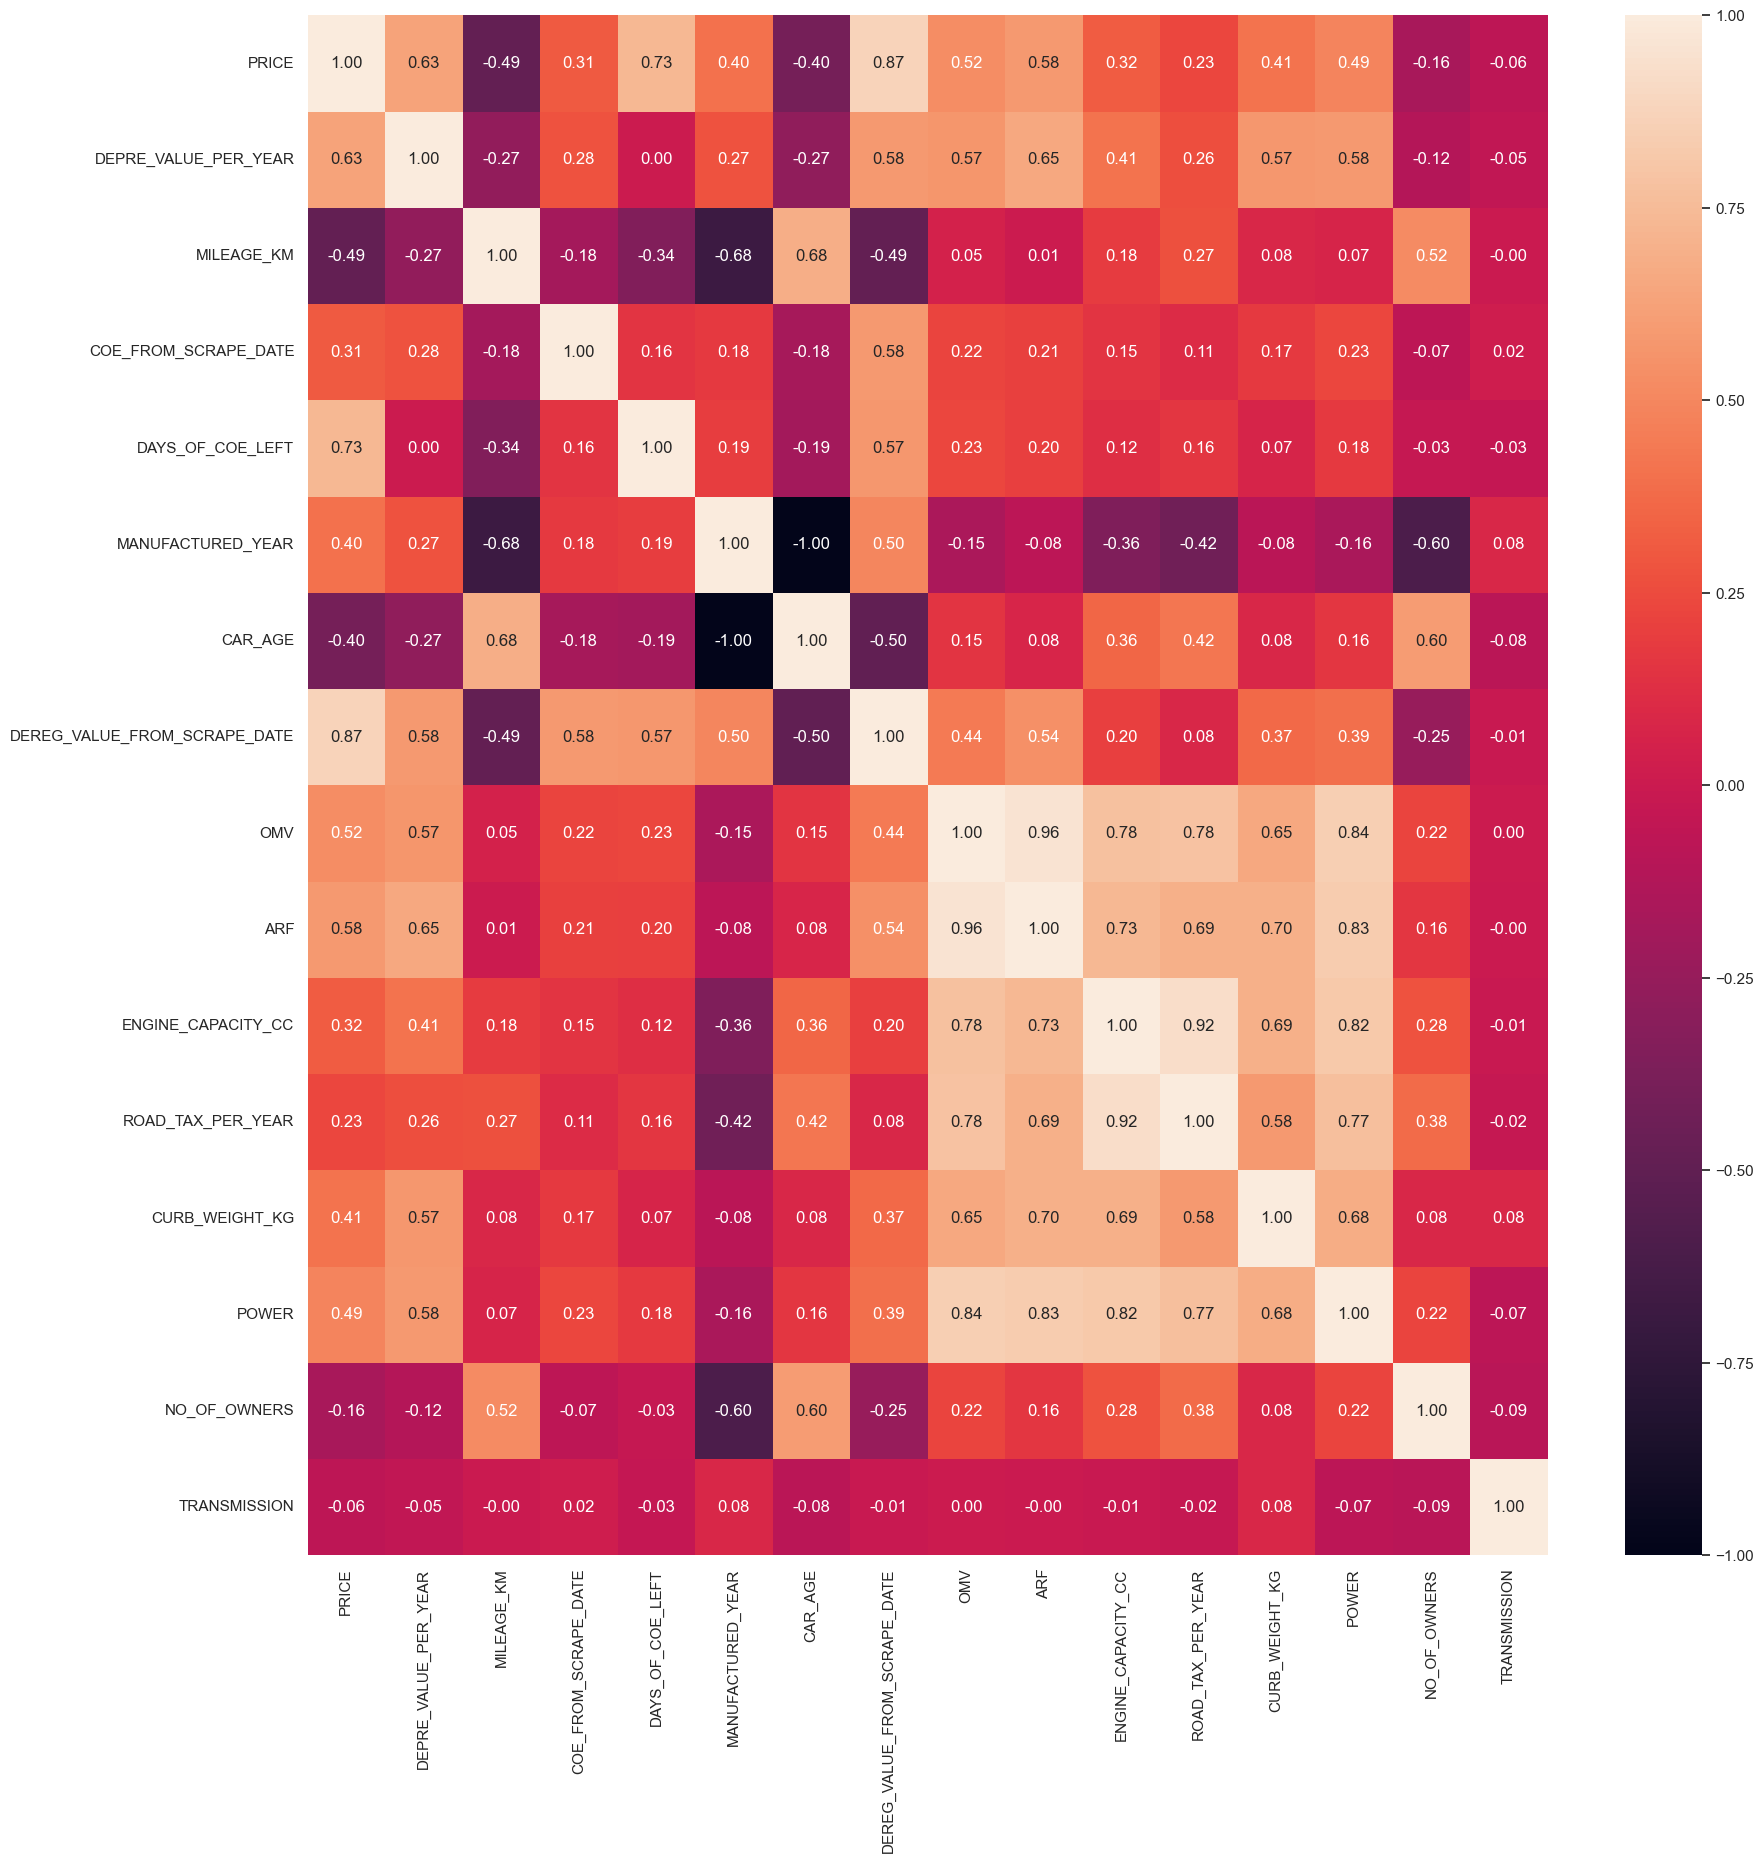

In [41]:
f = plt.figure(figsize=(20,20))
sb.heatmap(numDF.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

From here we can see that OMV and ARF have a very high correlation (0.96) which is easily explained as ARF is calculated based on a percentage of OMV. We also observe that ENGINE_CAPACITY_CC and ROAD_TAX_PER_YEAR has a high correlation (0.92) since road tax is derived from engine capacity. As such, they would be explaining the same thing as predictor variables. Thus, we can drop some of these variables.


<Axes: >

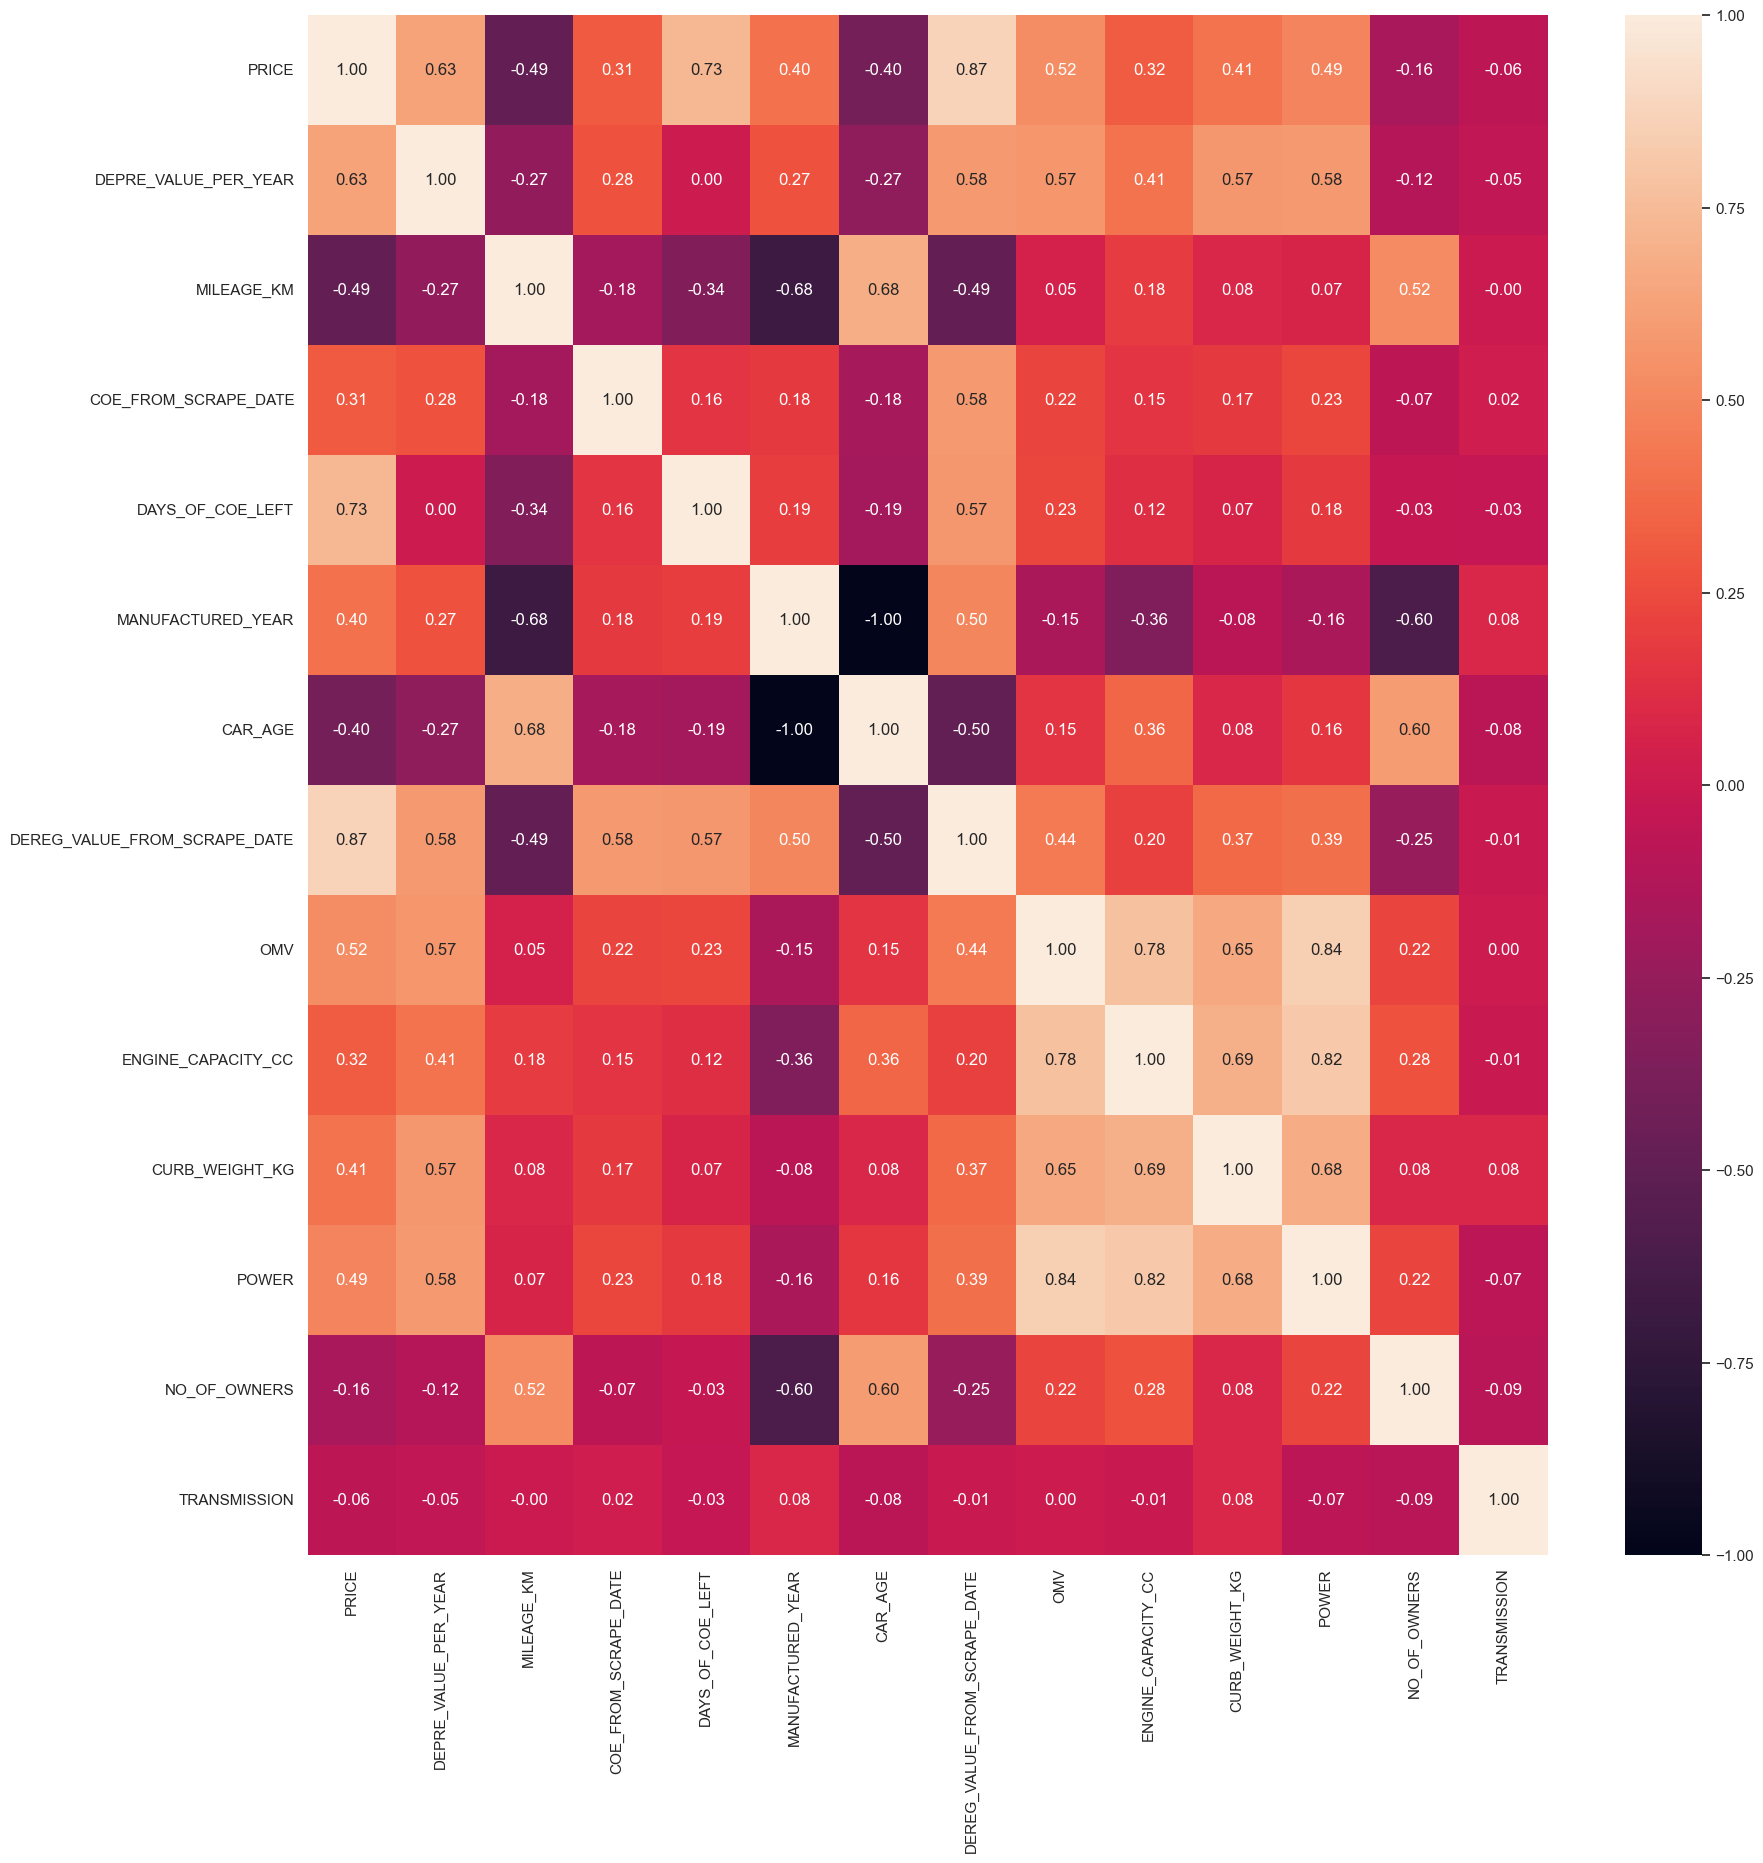

In [42]:
clean_df = numDF.drop(columns = ['ARF','ROAD_TAX_PER_YEAR'])
f = plt.figure(figsize = (20,20))
sb.heatmap(clean_df.corr(), vmin=-1,vmax=1,annot=True,fmt=".2f")

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


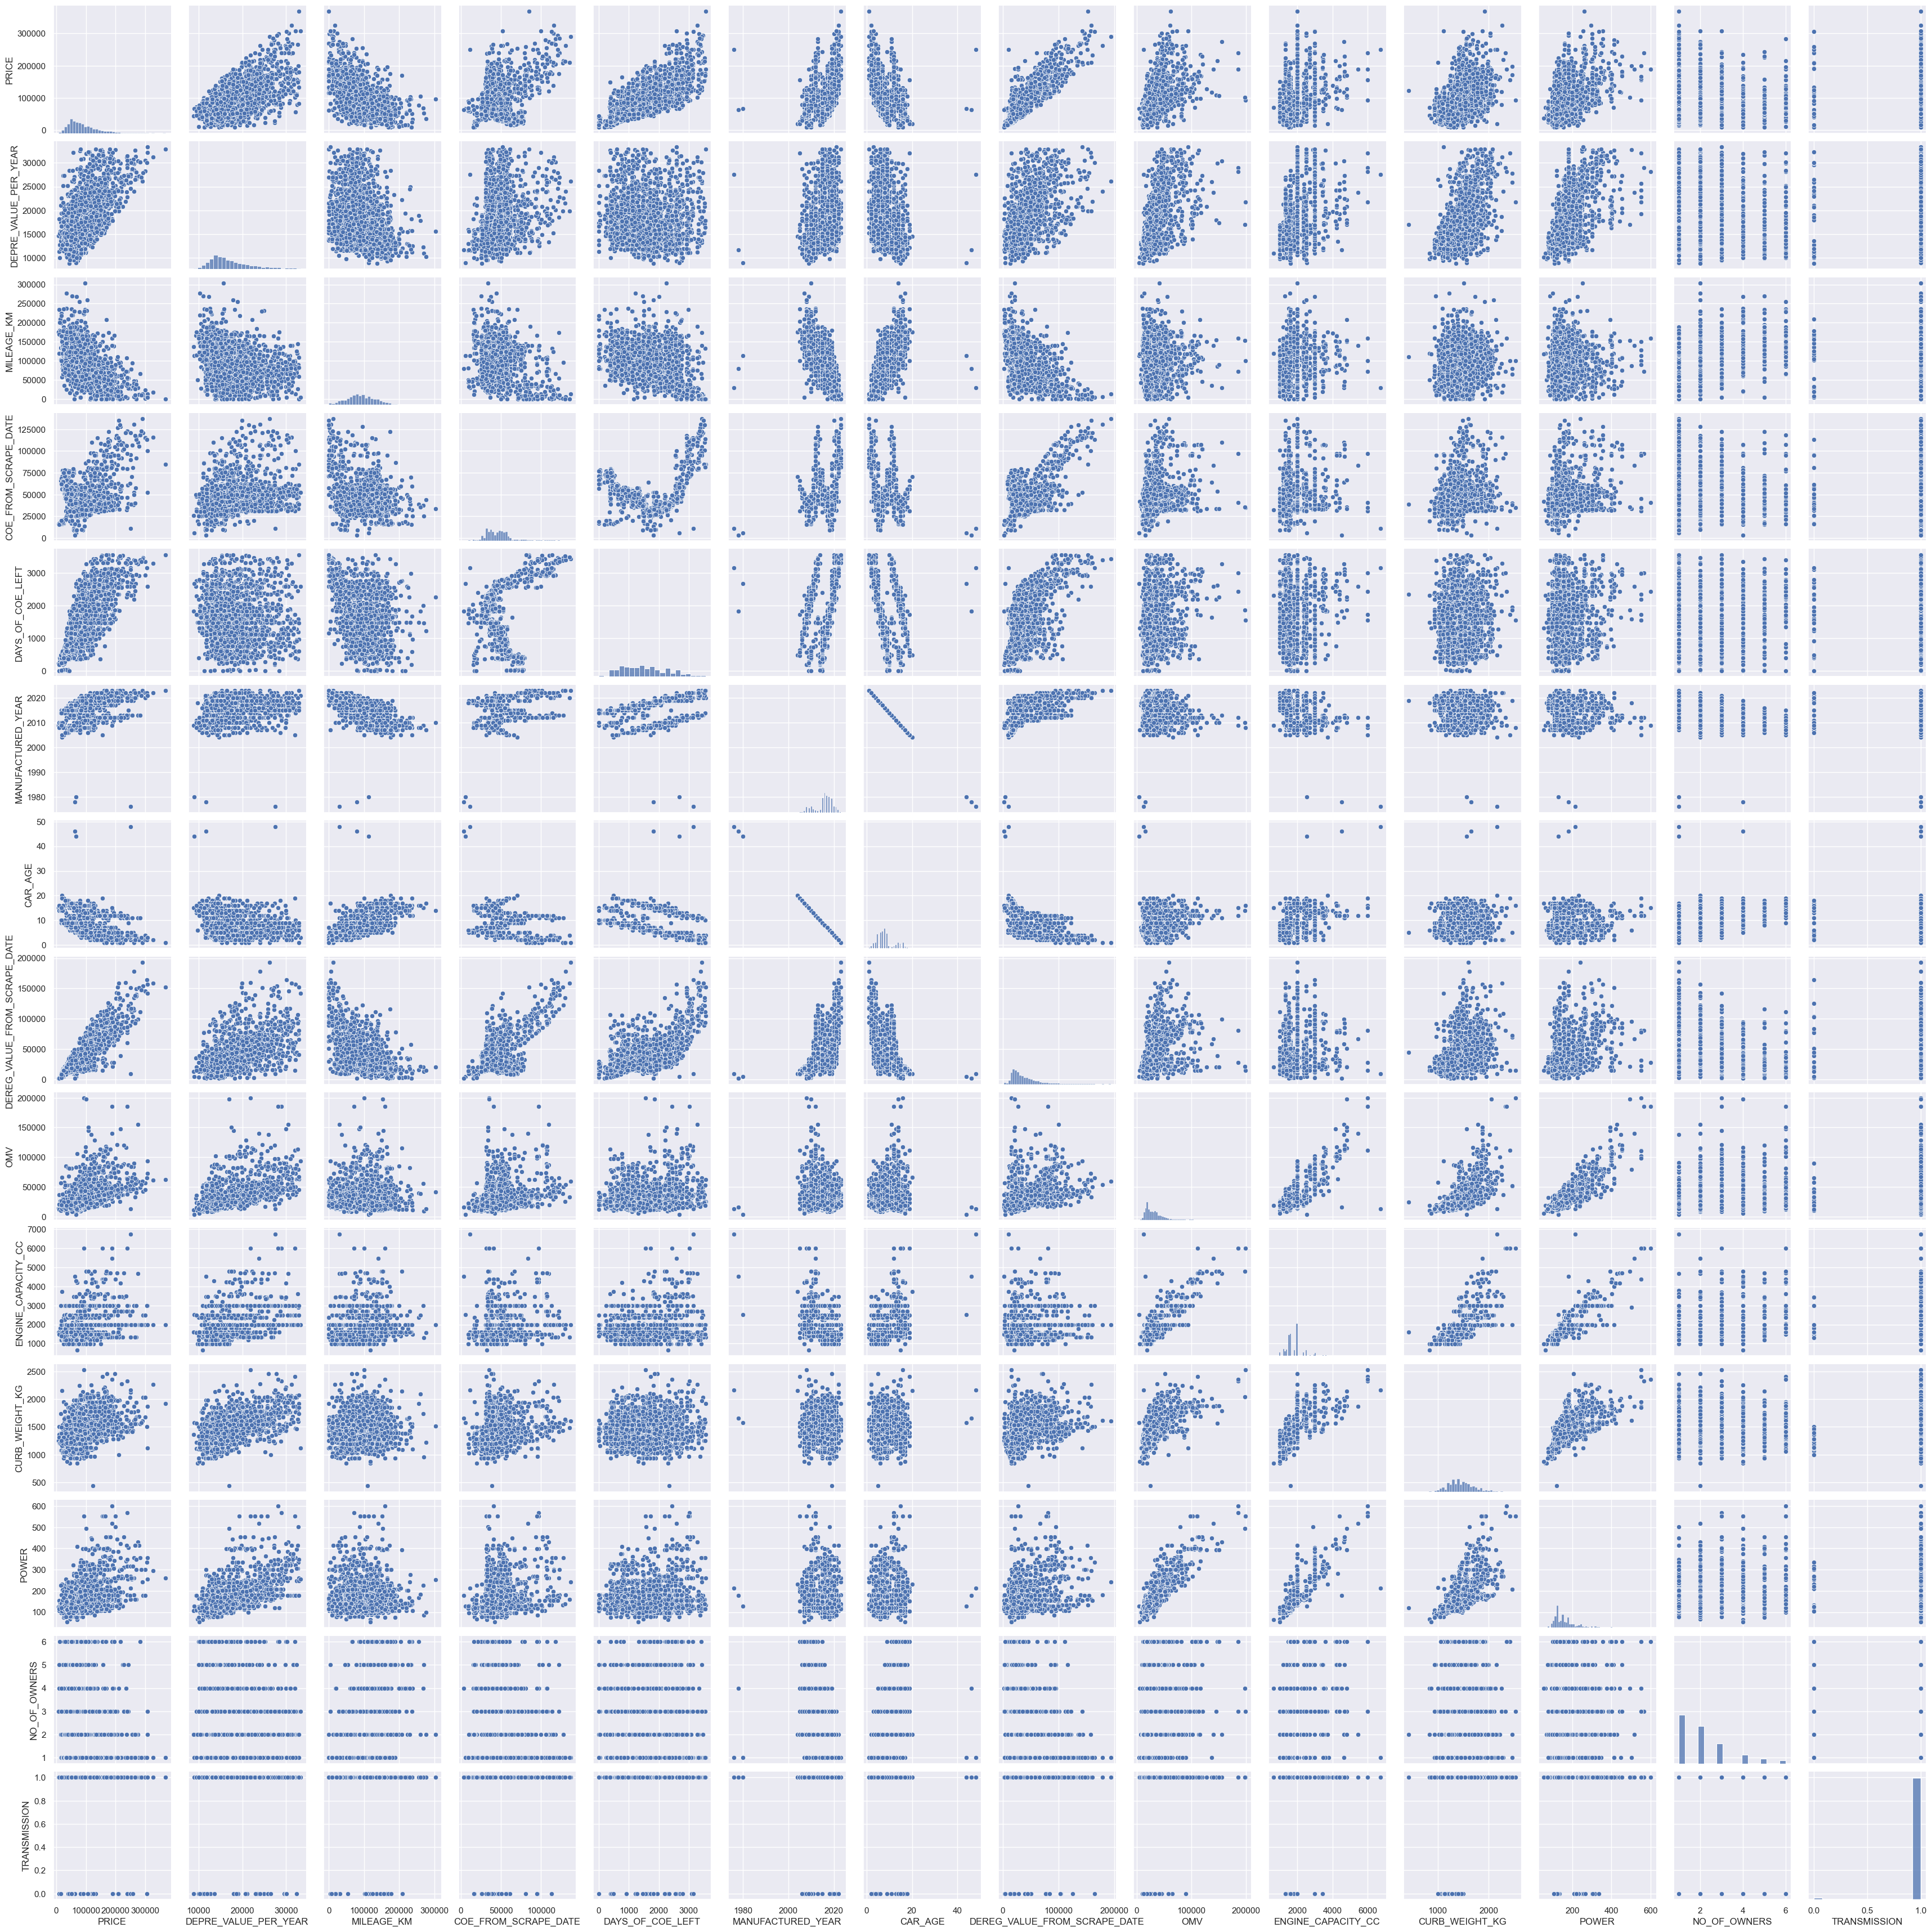

In [43]:
sb.pairplot(data=clean_df)

In [44]:
clean_df['LOG_PRICE'] = np.log10(clean_df['PRICE'])
clean_df.head()

PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  COE_FROM_SCRAPE_DATE  \
0    59300.0               14010.0     79000.0               40000.0   
1   152888.0               15950.0       600.0               80501.0   
2   213800.0               26010.0     15700.0               46790.0   
9   147800.0               19590.0     34000.0               40989.0   
10   94800.0               20150.0    117000.0               37605.0   

    DAYS_OF_COE_LEFT  MANUFACTURED_YEAR  CAR_AGE  \
0             1369.0               2018      6.0   
1             3071.0               2022      2.0   
2             2619.0               2021      3.0   
9             2349.0               2020      4.0   
10            1461.0               2018      6.0   

    DEREG_VALUE_FROM_SCRAPE_DATE      OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  \
0                        22806.0  11583.0              1591.0          1345.0   
1                        94713.0  30886.0              1499.0          1340.0   
2                        74121.0  44306.0              1991.0          1590.0   
9                        58735.0  36487.0              1395.0          1470.0   
10                       34763.0  25816.0              1969.0          1683.0   

    POWER  NO_OF_OWNERS  TRANSMISSION  LOG_PRICE  
0   125.0           2.0             1   4.773055  
1   107.0           1.0             1   5.184373  
2   301.0           1.0             1   5.330008  
9   147.0           2.0             1   5.169674  
10  248.0           2.0             1   4.976808

<Axes: xlabel='LOG_PRICE', ylabel='Count'>

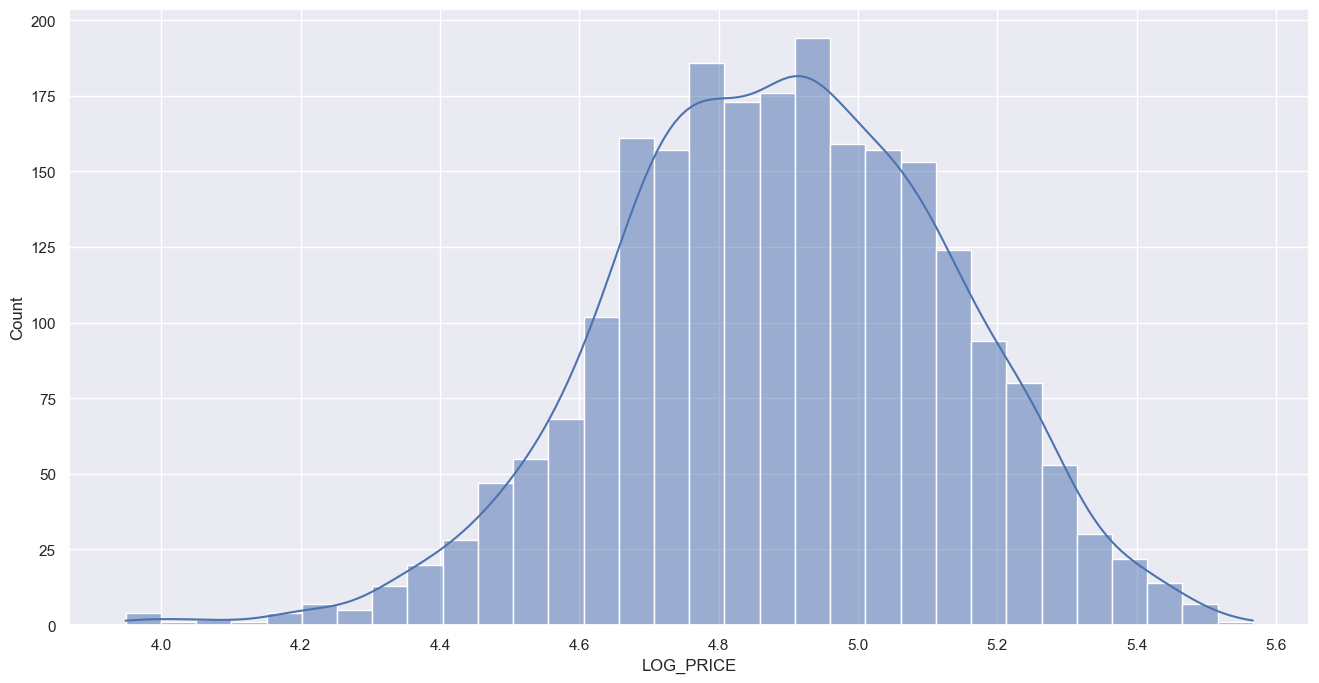

In [45]:
clean_df.drop(columns=['PRICE'])
f= plt.figure(figsize=(16,8))
sb.histplot(data=clean_df['LOG_PRICE'], kde=True)

In [46]:
clean_df.head()

PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  COE_FROM_SCRAPE_DATE  \
0    59300.0               14010.0     79000.0               40000.0   
1   152888.0               15950.0       600.0               80501.0   
2   213800.0               26010.0     15700.0               46790.0   
9   147800.0               19590.0     34000.0               40989.0   
10   94800.0               20150.0    117000.0               37605.0   

    DAYS_OF_COE_LEFT  MANUFACTURED_YEAR  CAR_AGE  \
0             1369.0               2018      6.0   
1             3071.0               2022      2.0   
2             2619.0               2021      3.0   
9             2349.0               2020      4.0   
10            1461.0               2018      6.0   

    DEREG_VALUE_FROM_SCRAPE_DATE      OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  \
0                        22806.0  11583.0              1591.0          1345.0   
1                        94713.0  30886.0              1499.0          1340.0   
2                        74121.0  44306.0              1991.0          1590.0   
9                        58735.0  36487.0              1395.0          1470.0   
10                       34763.0  25816.0              1969.0          1683.0   

    POWER  NO_OF_OWNERS  TRANSMISSION  LOG_PRICE  
0   125.0           2.0             1   4.773055  
1   107.0           1.0             1   5.184373  
2   301.0           1.0             1   5.330008  
9   147.0           2.0             1   5.169674  
10  248.0           2.0             1   4.976808

In [47]:
clean_df = clean_df.drop(columns = ['DEPRE_VALUE_PER_YEAR','TRANSMISSION','NO_OF_OWNERS','MANUFACTURED_YEAR'])

<Axes: >

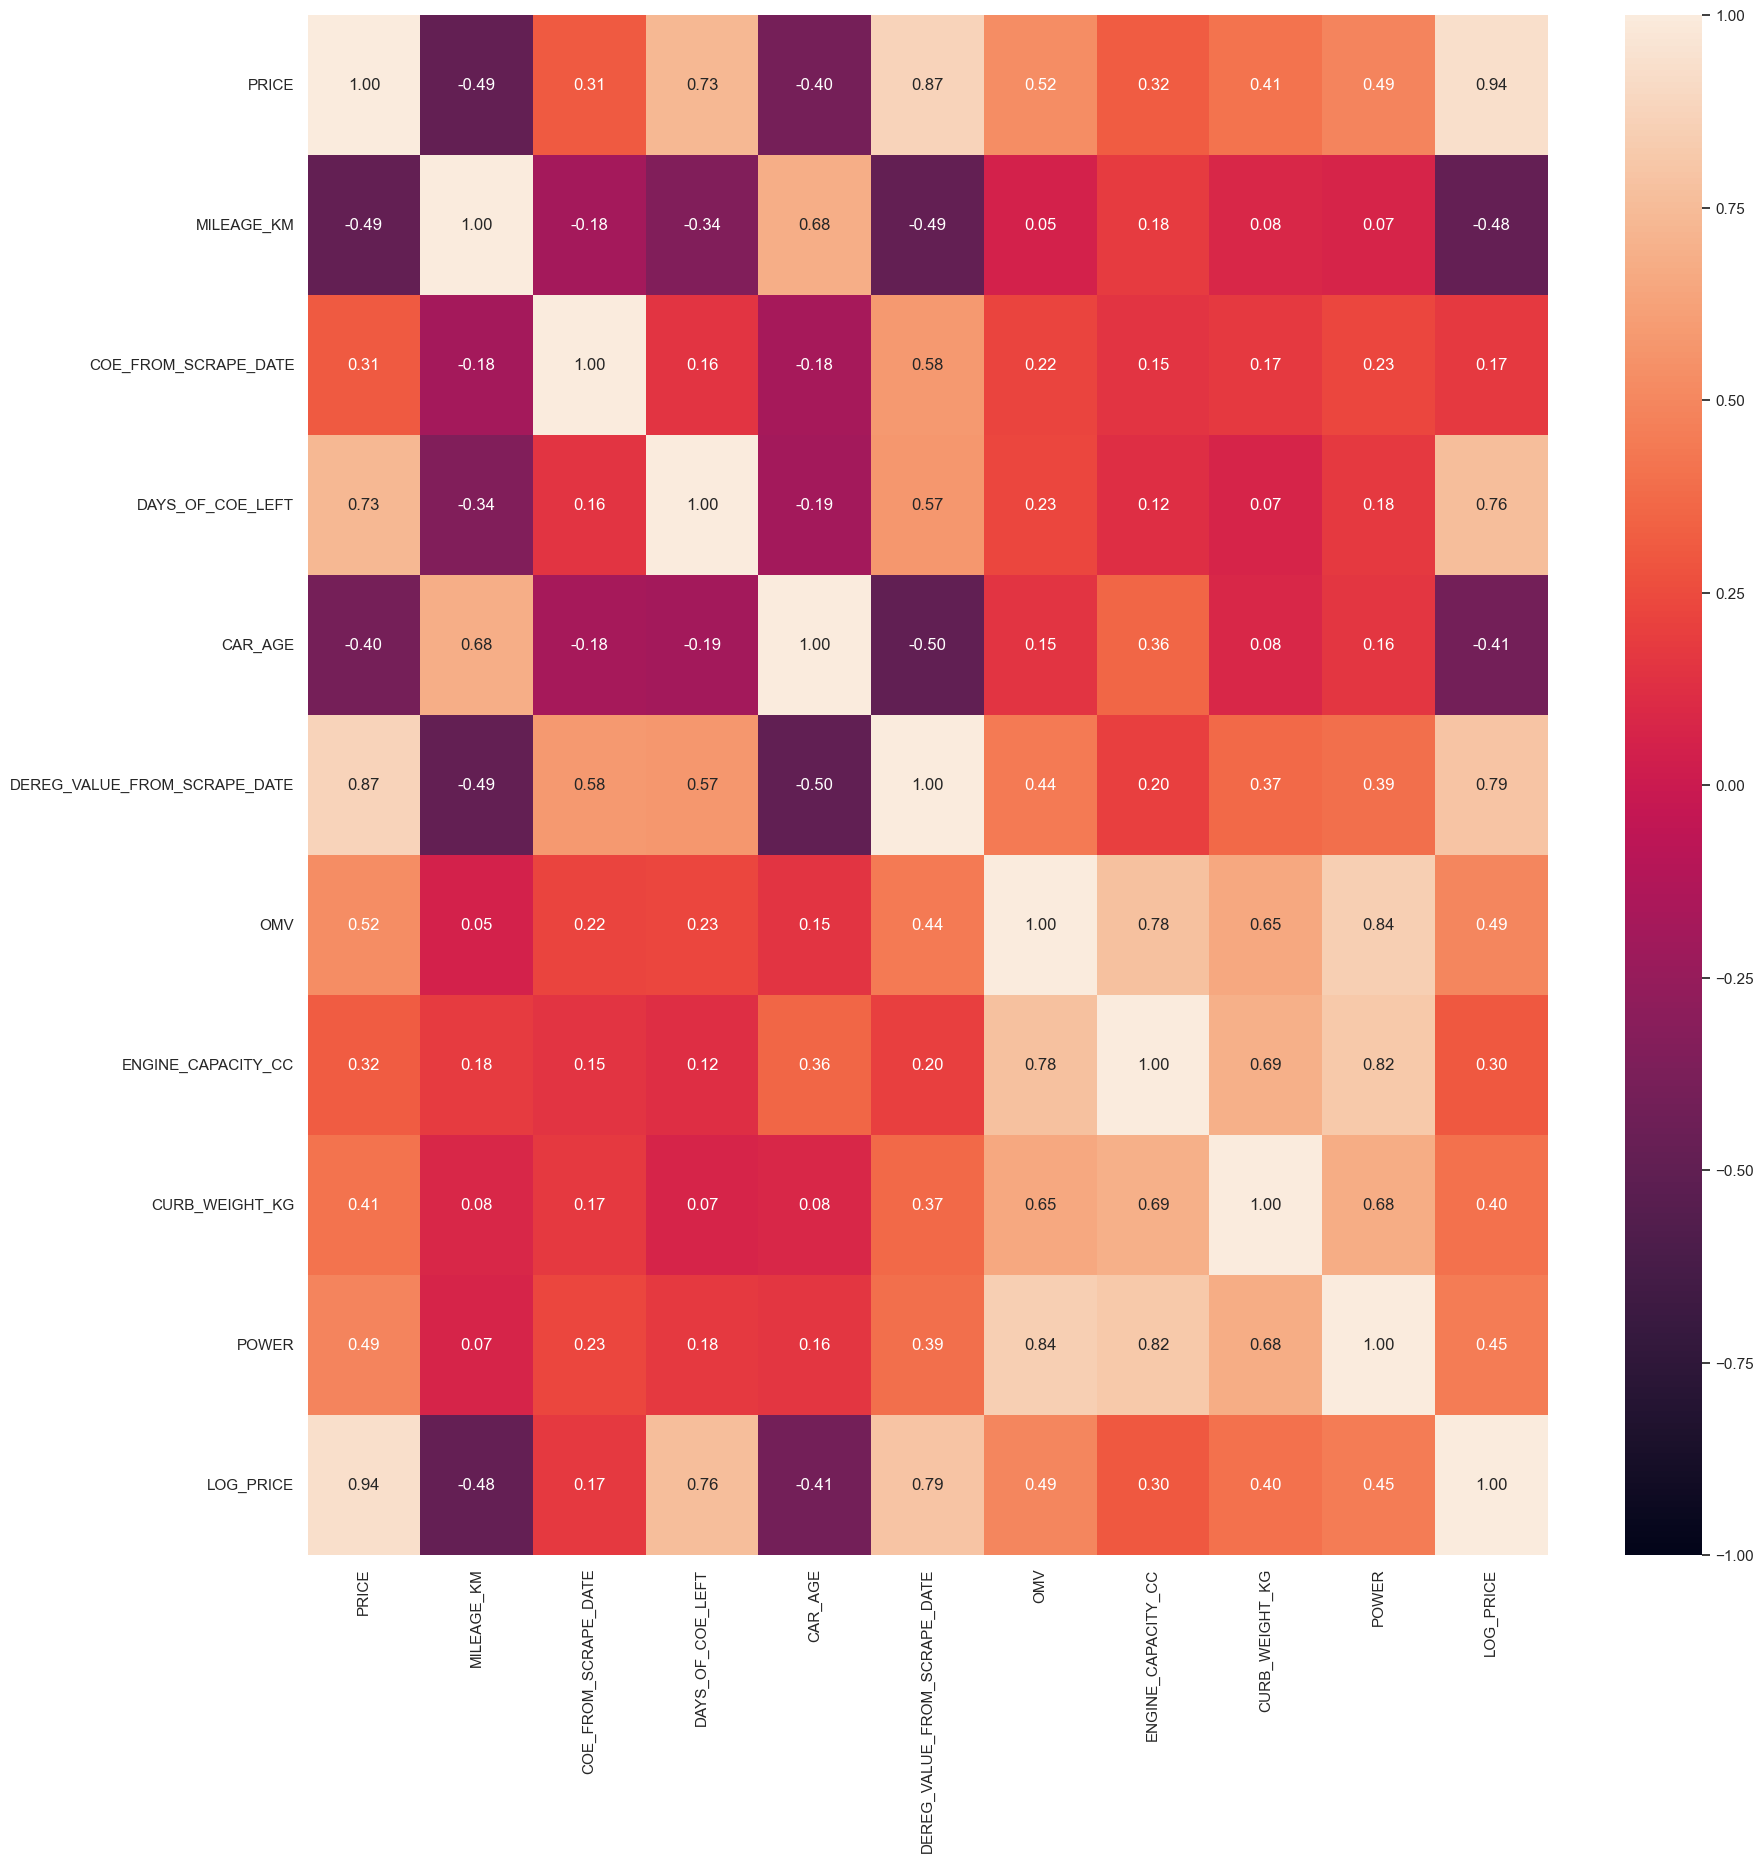

In [48]:
f = plt.figure(figsize=(20,20))
sb.heatmap(clean_df.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


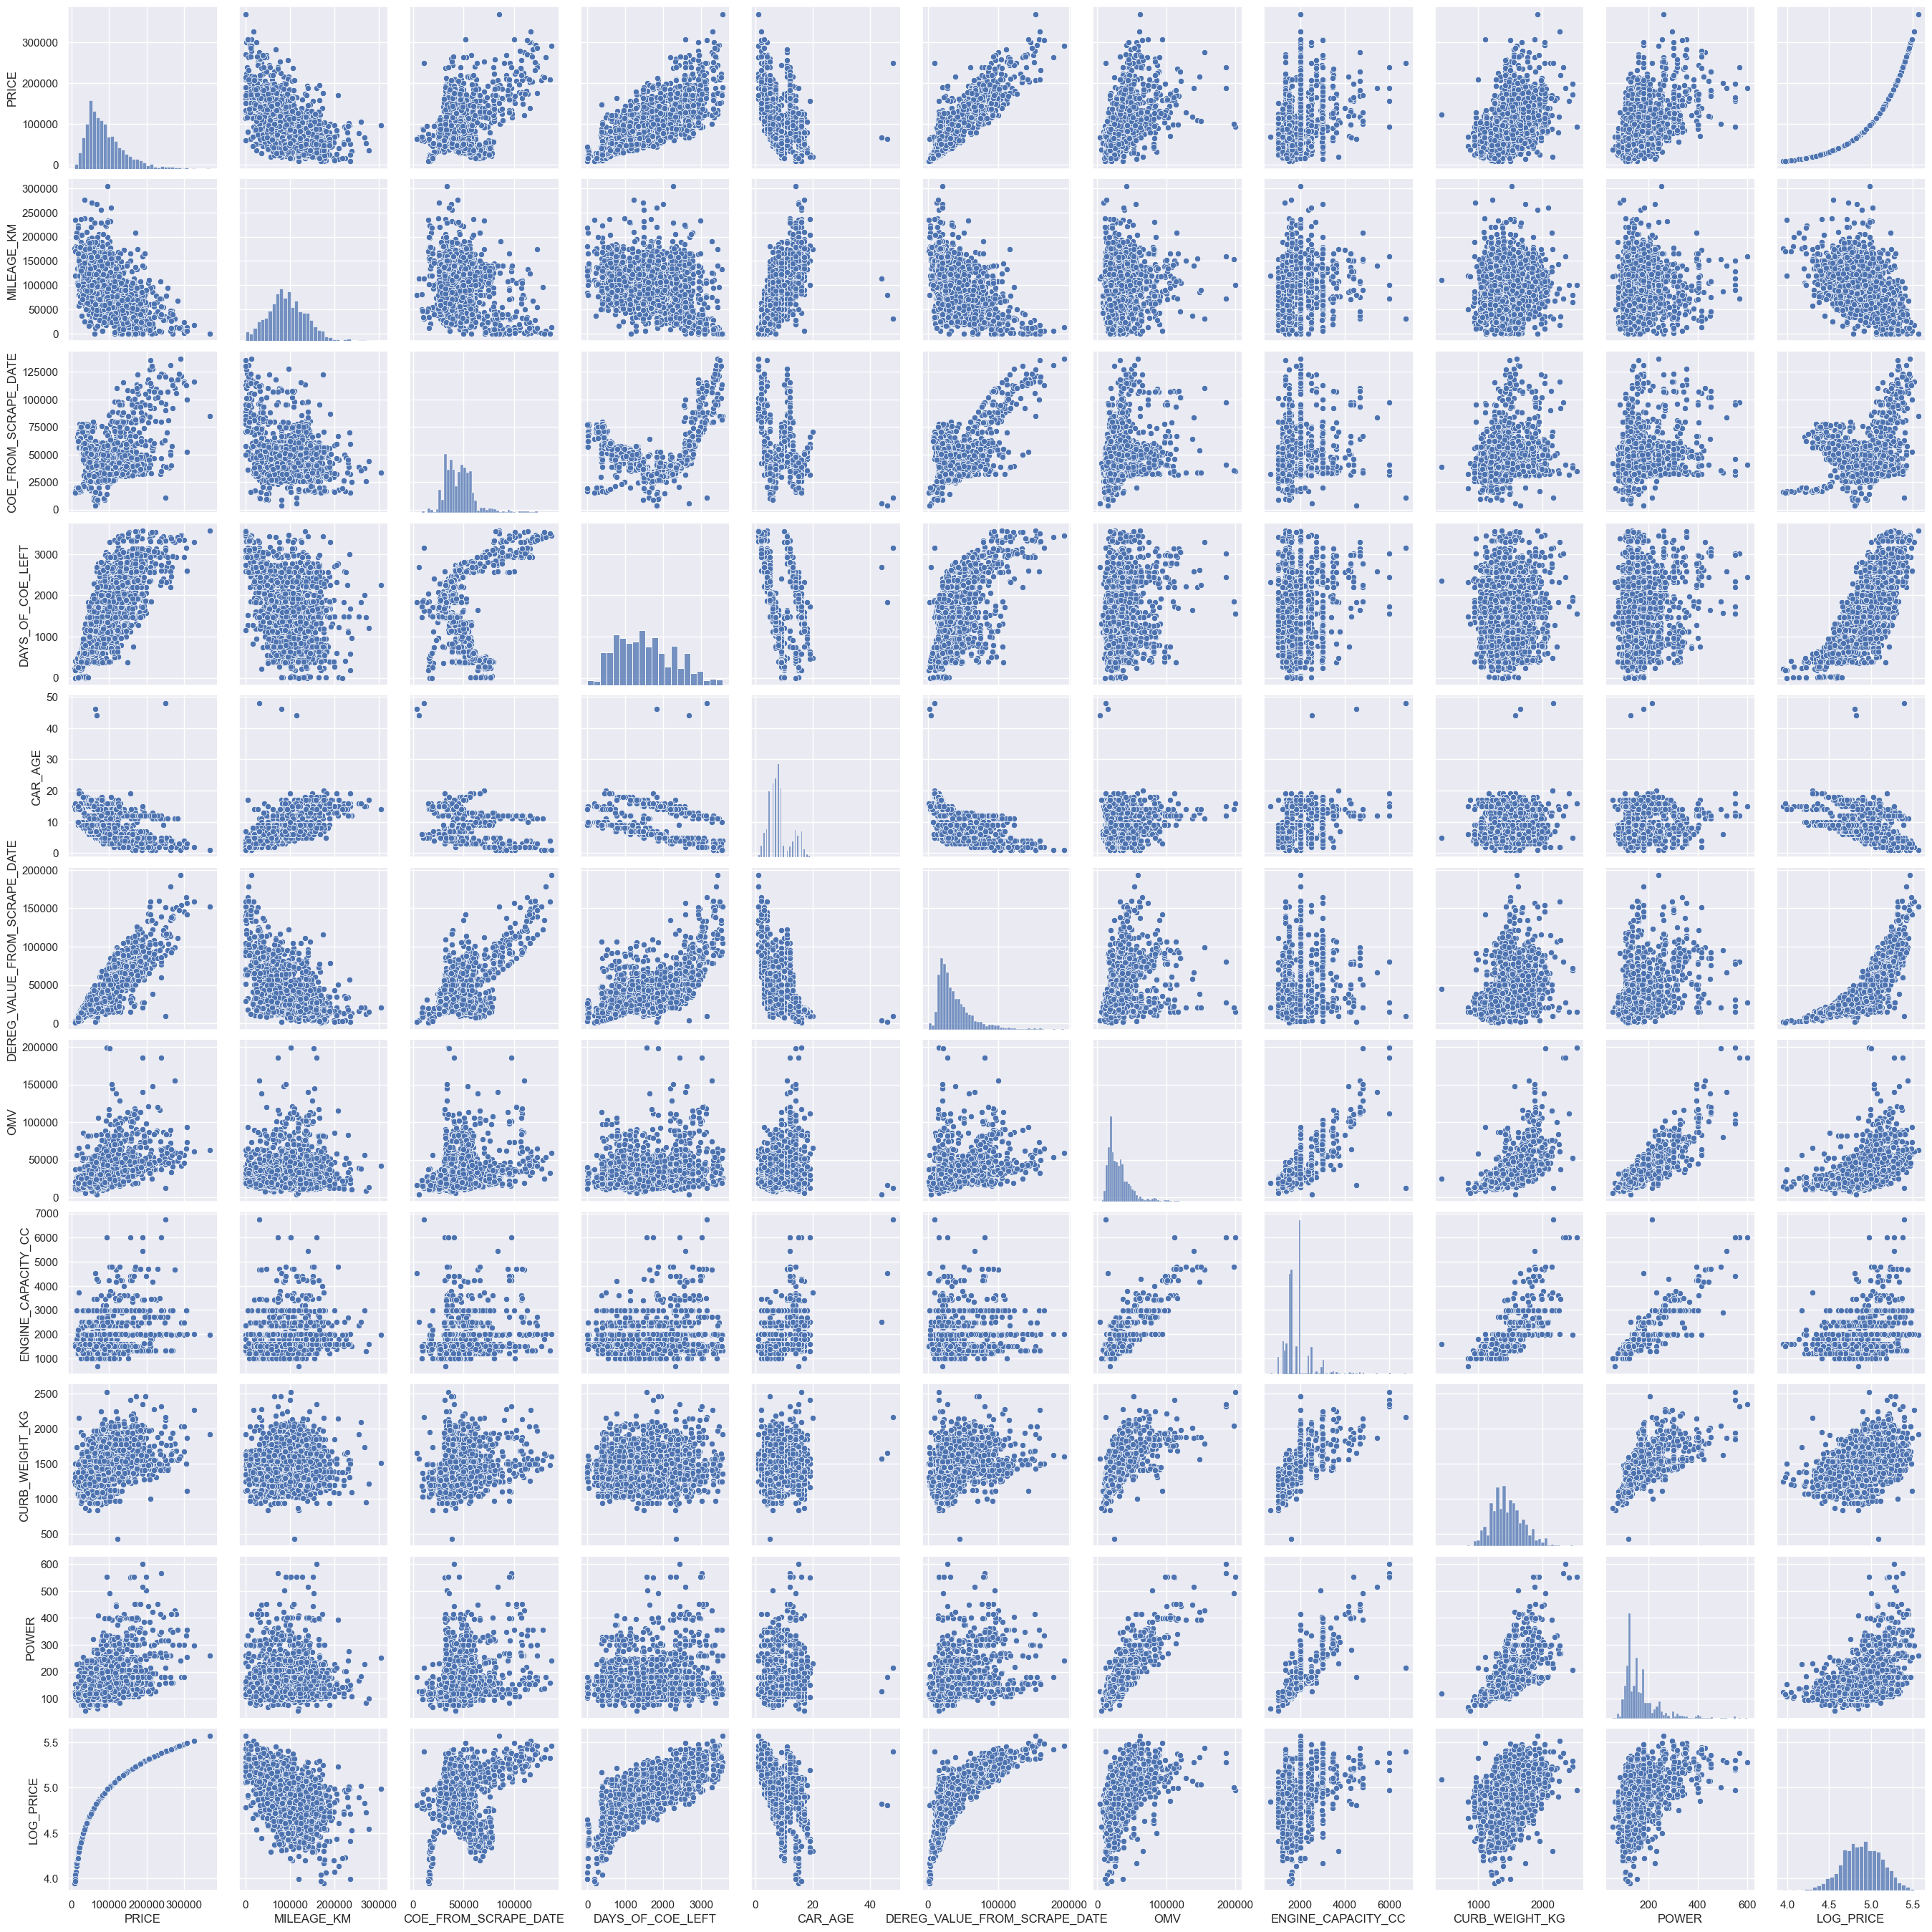

In [49]:
sb.pairplot(data=clean_df)

In [50]:
clean_df.to_csv("datasets/cleaned_data.csv")